### sklearn.linear_model.Ridge
- class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)


In [22]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import warings
warings.filterwarnings(ignore)

y_target = df['MEDV']
X_data = df.drop(['MEDV'],axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

ModuleNotFoundError: No module named 'warings'

In [7]:
ridge = Ridge(alpha=10)
neg_mean_scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 평군의 Negative MSE scores:', np.round(neg_mean_scores, 3))
print('5 folds의 개별 평군의 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 개별 평군의 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 평군의 Negative MSE scores: [-39.368 -21.739 -37.434 -26.32  -17.839]
5 folds의 개별 평군의 RMSE scores: [6.274 4.663 6.118 5.13  4.224]
5 folds의 개별 평군의 RMSE : 5.282


In [9]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [10]:
ridge.coef_

array([-0.09899991,  0.07158454, -0.03587402,  1.95096359, -1.97071905,
        3.200516  , -0.0056562 , -1.46784831,  0.32452012, -0.01618401,
       -0.70840332,  0.01143944, -0.61772405])

In [18]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]
# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5 folds의 평군 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평군 RMSE : 5.162
alpha 0.1일 때 5 folds의 평군 RMSE : 5.165
alpha 1일 때 5 folds의 평군 RMSE : 5.209
alpha 10일 때 5 folds의 평군 RMSE : 5.282
alpha 100일 때 5 folds의 평군 RMSE : 5.379


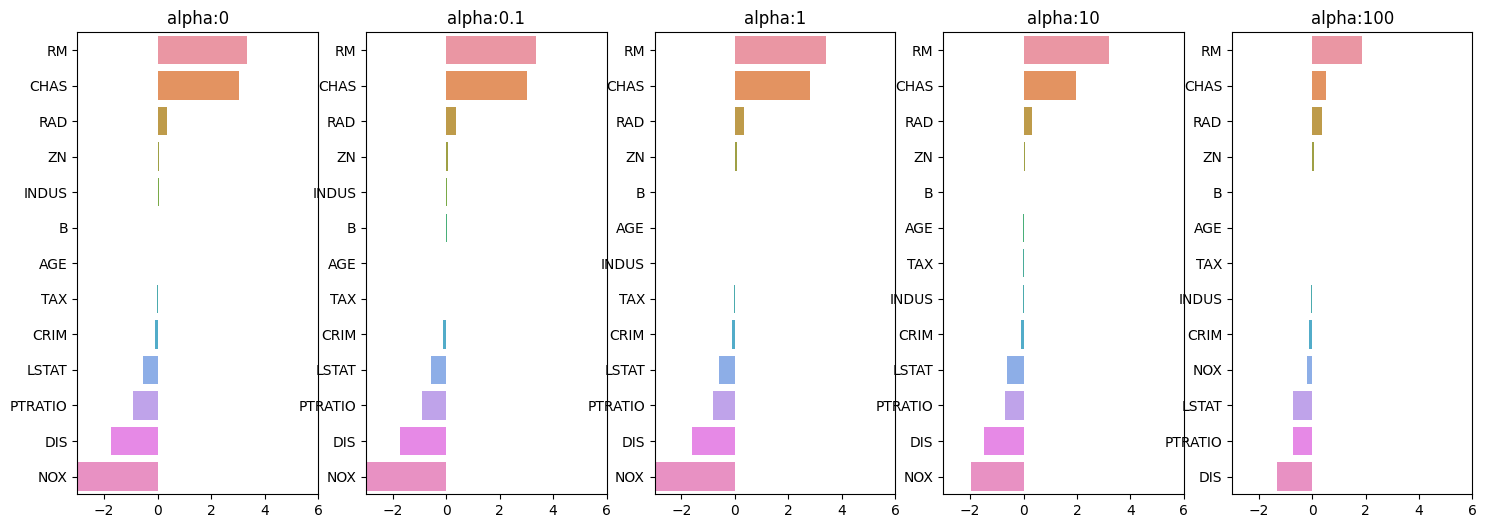

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()
# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    # alpha에 따른 피처별 회귀 계수를 Serise로 변환하고 이를 DateFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y = coeff.index, ax=axs[pos])

# for문 바깥에서 matplotlib의 show 호출 및 alpha에 따른 feature별 회귀 계수를 DataFrame으로 표시
plt.show()

In [17]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]
# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f'alpha {alpha}일 때 RMSE : {rmse:.3f}')

alpha 0일 때 RMSE : 4.159
alpha 0.1일 때 RMSE : 4.153
alpha 1일 때 RMSE : 4.148
alpha 10일 때 RMSE : 4.207
alpha 100일 때 RMSE : 4.400


In [21]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]
# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas : 
    ridge = Lasso(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5 folds의 평군 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평군 RMSE : 5.162
alpha 0.1일 때 5 folds의 평군 RMSE : 5.336
alpha 1일 때 5 folds의 평군 RMSE : 5.618
alpha 10일 때 5 folds의 평군 RMSE : 6.600
alpha 100일 때 5 folds의 평군 RMSE : 8.586


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+03, tolerance: 2.649e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

### sklearn.linear_model.Lasso
- class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

### sklearn.linear_model.ElasticNet
- class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [25]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀계수값들을 DataFeame으로 반환해주는 함수
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('#######', model_name,'#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=params)
        elif model_name == 'Lasso': model = Lasso(alpha=params)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=params, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse:.3f}')
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 반환하고 이를 DataFrame의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = f'alpha: {param}'
        coeff_df[colname] = coeff
    
    return coeff_df

# 예를 들어, Ridge 회귀 모델의 alpha 값과 데이터를 넣어서 함수를 호출하는 방법:
# coeff_df_ridge = get_linear_reg_eval('Ridge', params=[0.1, 1, 10], X_data_n=X_data, y_target_n=y_target)

In [28]:
# alpha 정리 -> 함수 적용
lasso_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n= X_train, y_target_n=y_train)

##### Lasso #####
alpha 0.07 RMSE: 5.329
alpha 0.1 RMSE: 5.336
alpha 0.5 RMSE: 5.394
alpha 1 RMSE: 5.618
alpha 3 RMSE: 6.245


In [29]:
coeff_ElasticNet_df = get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n= X_train, y_target_n=y_train)

##### ElasticNet #####
alpha 0.07 RMSE: 5.310
alpha 0.1 RMSE: 5.320
alpha 0.5 RMSE: 5.405
alpha 1 RMSE: 5.563
alpha 3 RMSE: 6.056
